# E-news Express Project
## CONTEXT:
#### An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

#### The design team of the company has created a new landing page. Randomly 100 users are selected and divided equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. A statistical analysis must be performed to answer the following questions using the collected data.

## OBJECTIVE:
#### Statistical analysis of business data must be performed which includes exploration of the dataset and extracting insights from the data to answer the following questions:

#### 1. Explore the dataset and extract insights using Exploratory Data Analysis.
#### 2. Do the users spend more time on the new landing page than the old landing page?
#### 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
#### 4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
#### 5.Is the mean time spent on the new page same for the different language users?
**Considering a significance level of 0.05 for all tests**.


## Data Dictionary:

#### 1. user_id - This represents the user ID of the person visiting the website.
#### 2. group - This represents whether the user belongs to the first group (control) or the second group (treatment).
#### 3. landing_page - This represents whether the landing page is new or old.
#### 4. time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
#### 5. converted - This represents whether the user gets converted to a subscriber of the news portal or not.
#### 6. language_preferred - This represents the language chosen by the user to view the landing page.


### Let us start by importing the required libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # library import for probability distributions as well as statistical functions
import scipy
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('abtest.csv')
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Observations:

The DataFrame has 6 columns as mentioned in the Data Dictionary. Data in each row corresponds to the time spent on the page with their rate of conversion and the preferred language opted by the customer.

### Exploratory Data Analysis (EDA)

## Univariate Analysis

In [3]:
# Shape of dataset
df.shape

(100, 6)

#### Observations:

* The DataFrame has 100 rows and 6 columns.

In [4]:
# summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* There are a total of 100 non-null observations in each of the columns.

* The dataset contains 6 columns: 1 is of integer type ('user-id'), 1 is of floating point type ('time_spent_on_the_page') and 4 are of the general object type ('group', 'landing_page', 'converted', 'language_preferred').

* Total memory usage is approximately 4.8 KB.


In [5]:
# converting "objects" to "category" to reduce data space required to store the dataframe
# code to convert 'group', 'landing_page', 'converted', 'language_preferred' into categorical data
df.group = df.group.astype('category')     # Convert group from object to category
df.landing_page = df.landing_page.astype('category')           # Convert landing page from object to category
df.converted = df.converted.astype('category')     # Convert converted from object to category
df.language_preferred = df.language_preferred.astype('category')     # Convert language_preferred from object to category
# summary of the revised DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observations:

* 'group', 'landing_page', 'language_preferred' and 'converted' are now converted into categorical values.

* Total memory usage has decreased now.


In [6]:
# summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:

* Time spent on the page ranges from 0.19 minutes to 10.71 minutes, with an average of around 5.37 minutes and a standard deviation of 2.37 minutes. 


#### User ID

In [7]:
# check unique user ID
df['user_id'].value_counts().shape

(100,)

#### Observations:

* There are 100 user ids. As mentioned earlier, 'user-id' is just an identifier for the customers.

#### Group

In [8]:
# check grouping type count
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### Observations:

* Out of 100 users in the data set, there are 50 users in control group (old landing page) and 50 users in treatment group (new landing page). 

In [9]:
# check landing page count
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

#### Observations:

* There are 50 counts of new landing page and 50 counts of old landing page. 

In [10]:
# check total number of conversions by YES and NO
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Observations:

* Out of overall 100 users in data set, 54 users converted to subscribers and 46 did not convert. Note that the 54 users belonged to both control group as well as treatment group. 

In [11]:
# check preferred language count
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observations:

* The split of preferred languages out of overall 100 users is - 34 French, 34 Spanish and remaining 32 English readers.

## Exploratory Data Analysis

## Univariate Analysis

In [12]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Types of Group

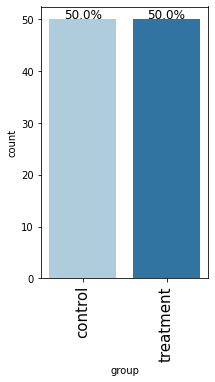

In [14]:
labeled_barplot(df, 'group', perc=True)

### Observation:
* There are two kinds of groups-which is control and treatment.
* 50% are from control group and 50% are from treatment group.
* The above plot says that the overall users are equally distributed among the control group and treatment group.

### Language Preferred:

In [15]:
# check preferred language count
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

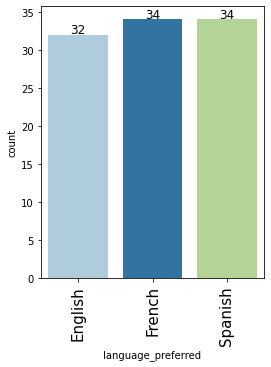

In [16]:
labeled_barplot(df, 'language_preferred', perc=False)

#### Observations:

* From the overall dataset, there are 3 unique language groups in the dataset which is English, Spanish and French.
* There are equal readers in Spanish and French language at 34 users, however the English readers is slightly less compared to the other two at 32 users.
* The above plot tells us that french and Spanish readers are slightly more than the English readers.



### Time spent on the page

In [17]:
print(df['time_spent_on_the_page'].mean())
print(df['time_spent_on_the_page'].min())
print(df['time_spent_on_the_page'].max())

5.377800000000002
0.19
10.71


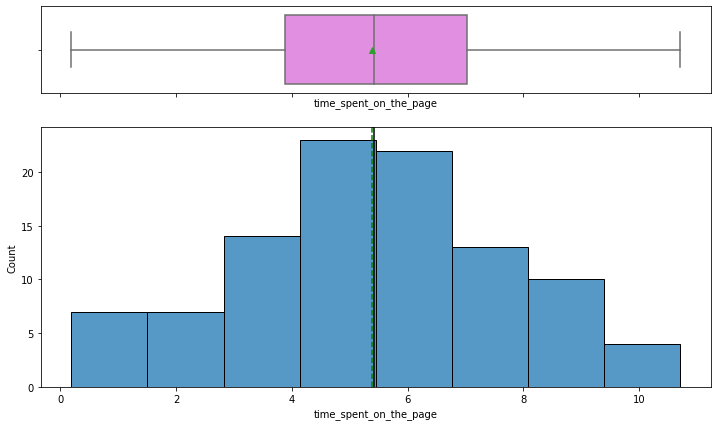

In [18]:
histogram_boxplot(df, 'time_spent_on_the_page')

#### Observations:

* The above plot shows that the time variable is normally distributed across the dataset.
* The mode of the distribution indicates that a large chunk of users spend around 4 to 6 minutes on the landing page,the average time being around 5.37 minutes.
* The plot also tells that there are more users who are spending more than 5 minutes on the landing page compared to the users spending less than 5 minutes.


### Conversion Rate

In [19]:
# check total number of conversions by YES and NO
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

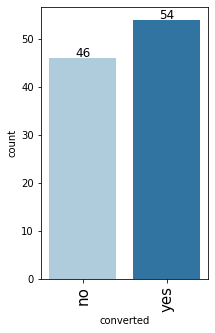

In [20]:
labeled_barplot(df, 'converted', perc=False)

#### Observations:

* From the overall dataset,it appears to be that the rate of conversion is higher when compared to the ones who have not converted.
* The above plot tells us that out of overall 100 users, 54 users have converted while the rest 46 have not. However we do know that there are two landing page(old & new), we will see how the distribution works when the language of the users is considered in the multivariate analysis.


## Multivariate Analysis

### Language preferred vs Conversion rate

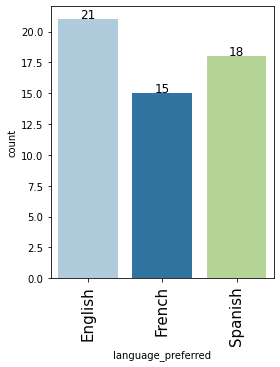

In [21]:
conv = df.loc[df["converted"] == "yes"]
labeled_barplot(conv, 'language_preferred', perc=False)

#### Observations:
* The above plot clearly shows out of 54 users who converted, 21 are English readers, 15 are French readers and 18 are Spanish readers.
* The conversion rate of the English and Spanish users is high while French readers dont seem to convert after reading the landing page.

### Conversion rate with the old and new landing page

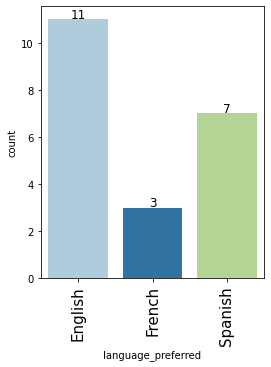

In [22]:
oldlp = conv.loc[conv["landing_page"] == "old"]
labeled_barplot(oldlp, 'language_preferred', perc=False)

#### Observations:
* The above plot shows the conversion rate by users using the old landing page.
* Out of 54 people who became subscribers, 21 users were using the old landing page.
* Out of 21 users using the old landing page, 11 users are English, 3 are French and 7 are Spanish readers.
* English people seem to subscribe more using the old landing page.

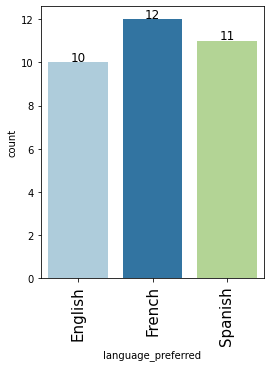

In [23]:
newlp = conv.loc[conv["landing_page"] == "new"]
labeled_barplot(newlp, 'language_preferred', perc=False)

#### Observations:
* The above plot shows the conversion rate by users using the new landing page.
* Out of 54 users who converted, 33 users have used the new landing page.
* Out of 33 users, 10 users are English, 12 are French and 11 are Spanish readers.
* The rate of conversion for French readers has significantly improved for the new landing page when compared to the old landing page.
* The above plot shows that the new landing page is being successful in making the users subscribe more.

### Landing Page vs Time Spent on the Page

In [24]:
df.groupby('landing_page')['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

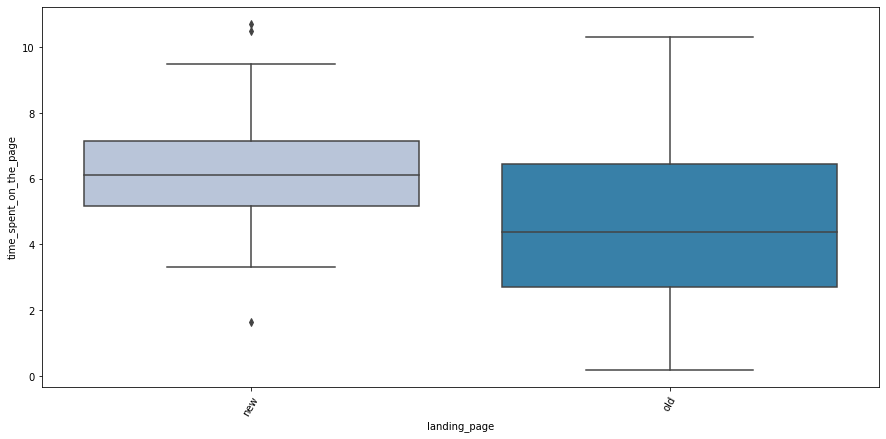

In [25]:
# Relationship between landing page and time spent on the page.
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* From the above plot, it is evident that users are spending more time in new landing page at an average time of 6.22 minutes compared to 4.53 minutes spent in old landing page. 
* The new landing page is also making users spend more time on it compared to the time being spent on the old landing page. 

### Conversion Rate vs Time Spent on the Page

In [26]:
df.groupby('converted')['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

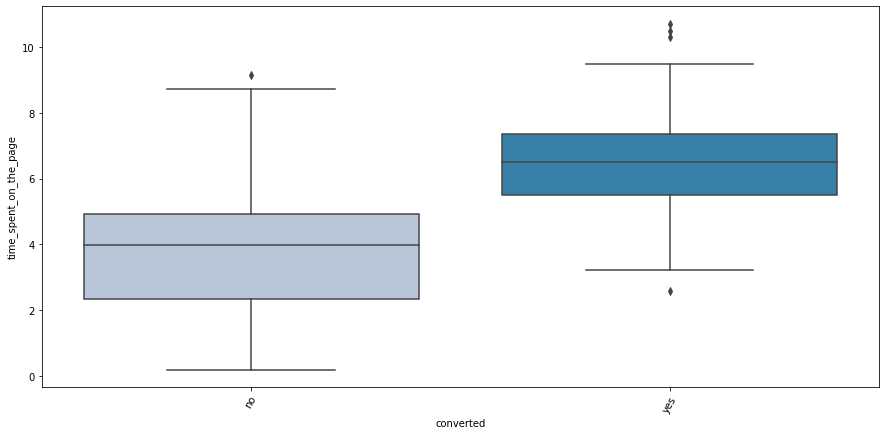

In [27]:
# Relationship between conversion rate and time spent on the page.
plt.figure(figsize=(15,7))
sns.boxplot(x = "converted", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* As shown in the above plot, we can infer that the users tend to convert when they spend more time on landing page.
* The average time spent by the users who did not convert is 3.91 minutes whereas the average time spent by the users who did convert is 6.62 minutes.


### Preferred Language vs Time Spent on the Page

In [28]:
df.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    5.559063
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

In [29]:
#Time spent with preferred language using old landing page.
df_old = df[(df['landing_page']=="old")]
print(df_old.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    4.454375
French     4.310000
Spanish    4.828235
Name: time_spent_on_the_page, dtype: float64


In [30]:
#Time spent with preferred language using new landing page.
df_new = df[(df['landing_page']=="new")]
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


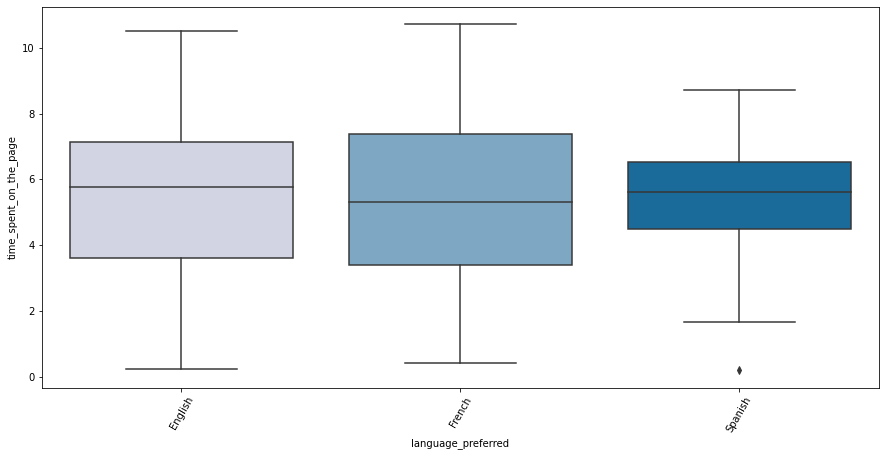

In [31]:
# Relationship between language preferred and time spent on the page.
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

#### Observations:

* Of the overall 100 users using both old landing page as well as new landing page, the time spent on the page by preferred language users is as follows:
* The average time spent by the English users is 5.55 minutes.
* The average time spent by the French users is 5.25 minutes.
* The average time spent by the Spanish users is 5.33 minutes.
* The plot also shows that there are more number of French readers who are spending more time on the landing page and the Spanish readers spend less time on the landing page.

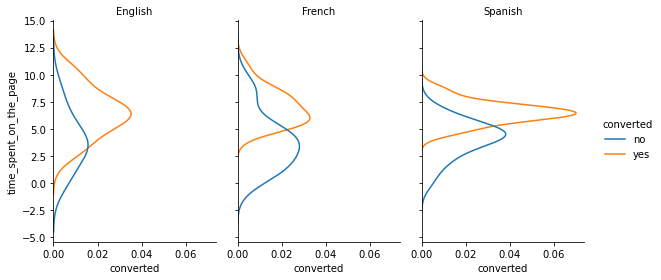

In [32]:
s = sns.displot(
    data=df, y="time_spent_on_the_page", hue="converted", col="language_preferred",
    kind="kde", height=4, aspect=.7,
)
s.set_axis_labels("converted", "time_spent_on_the_page")
s.set_titles("{col_name}")

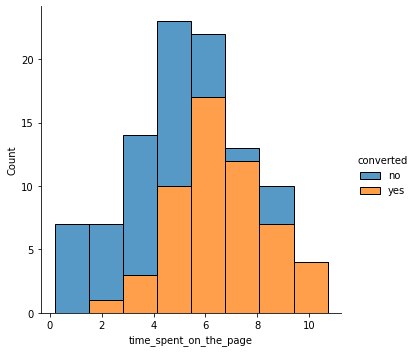

In [33]:
sns.displot(data=df, x="time_spent_on_the_page", hue="converted", multiple="stack")

# 2. Do the users spend more time on the new landing page than the old landing page?

## Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum time spent and maximum time spent on the page.

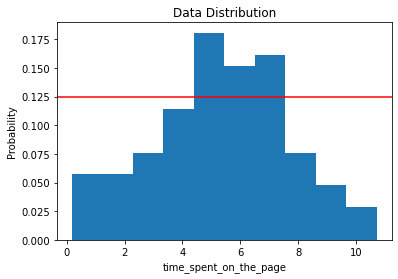

In [34]:
# visualize the distribution of the time spent on the page
plt.hist(df["time_spent_on_the_page"], density=True)
plt.axhline(1 / 8, color="red")
plt.xlabel("time_spent_on_the_page")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

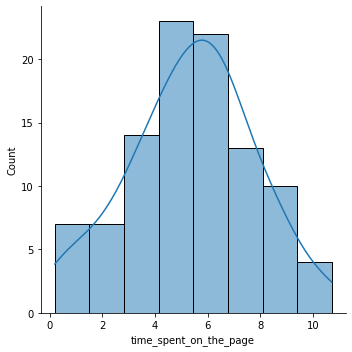

In [35]:
# Density plot of time spent on the page
sns.displot(df["time_spent_on_the_page"], kde=True)
plt.show()

Let's write the null and alternative hypothesis
Let  𝜇1,𝜇2  be the mean of the time spent by the users on the old and new landing page respectively.

We want to test whether the time spent on the new is higher than the old landing page.

We will test the null hypothesis.
Let 𝜇1 be the time spent on the new landing page.
Let 𝜇2 be the time spent on the old landing page.

𝐻0:𝜇1=𝜇2 
which is users spend equal amount of time in the old and the new landing page,

against the alternate hypothesis
which is users spend greater amount of time on the new landing page,
𝐻𝑎:𝜇1>𝜇2.

We are going to use the **two independent sample t-test with the level of significance as 0.05.**

In [36]:
#To formulate data needed for the test statistic.
time_new = df.query('landing_page == "new"')["time_spent_on_the_page"]
time_old = df.query('landing_page == "old"')["time_spent_on_the_page"]
df.groupby('landing_page').describe()

user_id                                                     \
               count      mean       std       min        25%       50%   
landing_page                                                              
new             50.0  546467.5  14.57738  546443.0  546455.25  546467.5   
old             50.0  546566.5  17.67767  546493.0  546555.25  546567.5   

                                  time_spent_on_the_page                    \
                    75%       max                  count    mean       std   
landing_page                                                                 
new           546479.75  546492.0                   50.0  6.2232  1.817031   
old           546579.75  546592.0                   50.0  4.5324  2.581975   

                                                 
               min    25%    50%     75%    max  
landing_page                                     
new           1.65  5.175  6.105  7.1600  10.71  
old           0.19  2.720  4.380  6.4425  10.30

In [37]:
#Importing the required function
from scipy.stats import ttest_ind
#To find the p-value
test_stat, p_value = ttest_ind(time_new, time_old, equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 0.0001392381225166549


### Insight :
* As the p-value is less than the level of significane, we can reject the null hypothesis. We do not have enough evidence to support the claim that the users spend equal amount of time on the new and the old landing page. Hence we can conclude that users spend more time on the new landing page.

## Visual Analysis

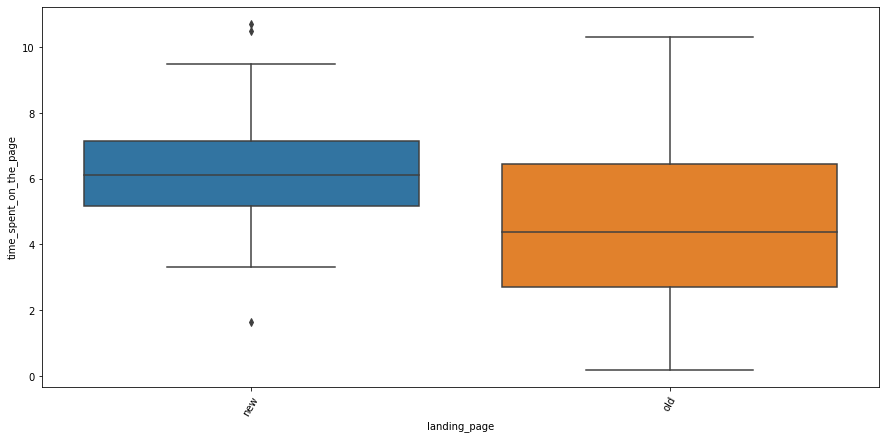

In [38]:
#To find out how much time is spent on the new and old landing page.
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", data = df,)
plt.xticks(rotation = 60)
plt.show()

## Insight: 
* The box plots confirms visually that the users spend more time on the new landing page than the old landing page.

# 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Let's write the null and alternative hypothesis
Let 𝑝1,𝑝2 be the proportions of the rate of conversions for the new and the old landing page respectively.

Our Null hypothesis will be that the rate of conversion for the new page is equal to the rate of conversion on the old page.

𝐻0:𝑝1=𝑝2

against the alternate hypothesis which is the rate of conversion for the new page is higher than the rate of conversion on the old page.

𝐻𝑎:𝑝1>𝑝2

We are going to use the **Two proportions z-test with the level of significance set to 0.05.**

In [39]:
#To formulate data needed for the test statistic.
con_new = df.query('landing_page == "new"')['converted'].value_counts()['yes']
con_old = df.query('landing_page == "old"')['converted'].value_counts()['yes']
new_con = df.landing_page.value_counts()['new']
old_con = df.landing_page.value_counts()['old']
print('The number of conversions from the new page is', con_new)
print('The number of conversions from the old page is', con_old)
print('The total number of users for the new page is', new_con)
print('The total number of users for the old page is', old_con)

The number of conversions from the new page is 33
The number of conversions from the old page is 21
The total number of users for the new page is 50
The total number of users for the old page is 50


In [40]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of converted items
conversion_count = np.array([32, 23])

# set the sample sizes
count = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(conversion_count, count, alternative = 'larger')
print('The p-value is ' + str(p_value))


The p-value is 0.035220214636043995


### Insight: 
* As the p-value is less than the level of significance, we can reject the null hypothesis. We do not have enough evidence to support the claim that the conversion rate for the new page is the same as the conversion rate for the old page. Hence we can conclude that the rate of conversion for the new page is higher than the rate of conversion on the old page.

## Visual Analysis

<AxesSubplot:xlabel='landing_page', ylabel='Count'>

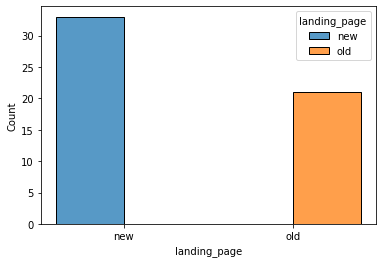

In [41]:
conv = df.loc[df["converted"] == "yes"]
sns.histplot(data=conv, x='landing_page', hue='landing_page', multiple='dodge', shrink=.8)

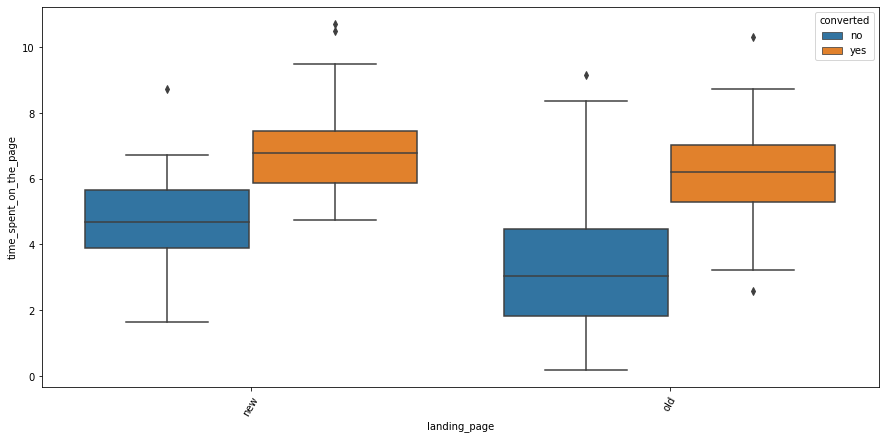

In [42]:
#To find out how much time is spent on the new and old landing page.
plt.figure(figsize=(15,7))
sns.boxplot(x = "landing_page", y = "time_spent_on_the_page", hue="converted", data = df,)
plt.xticks(rotation = 60)
plt.show()

## Insight: 
* The above histogram clearly shows visually that the conversion rate is higher for the users from the new landing page.

# 4. Does the converted status depend on the preferred language?

Let's write the null and alternative hypothesis.

Our Null hypothesis is that the converted status is independent of the preferred language.

𝐻0: Converted status is independent of preferred language.

against the alternate hypothesis which is the converted status depends on the preferred language.

𝐻𝑎:  Converted status depends on preferred language.
Since it involves categorical variables and a contingency table, we are going to use **Chi Square test of independence** with the level of significance set to 0.05.

In [43]:
#To formulate data needed for the test statistic.
lang_stats = pd.crosstab(df.language_preferred, df.converted, margins= True)
print(lang_stats)

converted           no  yes  All
language_preferred              
English             11   21   32
French              19   15   34
Spanish             16   18   34
All                 46   54  100


In [44]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lang_stats)
print('The p-value is', p_value)

The p-value is 0.7970832186581234


### Insight:
* As the p-value is greater than the level of significance, we fail to reject the null hypothesis. Therefore we have enough evidence to support the claim that the converted status is independent of the preferred language.

## Visual Analysis

<AxesSubplot:xlabel='language_preferred', ylabel='Count'>

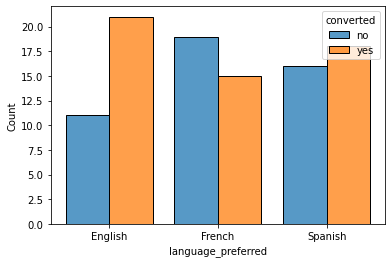

In [45]:
sns.histplot(x="language_preferred", hue="converted", multiple="dodge", data=df, stat="count", shrink=0.8)

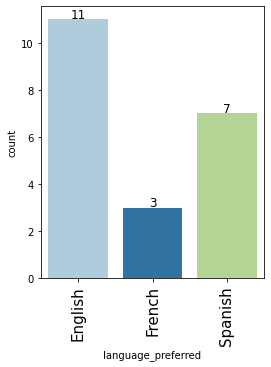

In [46]:
oldlp = conv.loc[conv["landing_page"] == "old"]
labeled_barplot(oldlp, 'language_preferred', perc=False)

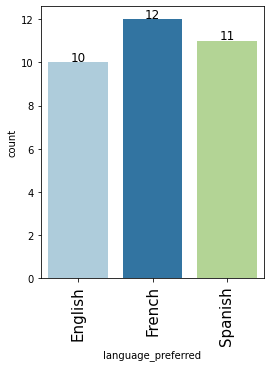

In [47]:
newlp = conv.loc[conv["landing_page"] == "new"]
labeled_barplot(newlp, 'language_preferred', perc=False)

## Insight:
* In the first plot, we can see that English and Spanish readers converted more when compared to the French readers.
* However in the second and the third plot, we can see how the readers conversion rate is distributed among the users who use old landing page and new landing page.
* The conversion rate is higher for English readers who use the old landing page, however the conversion is higher for French and Spanish readers using the new landing page. Hence we can conclude that we do not have enough evidence to support that conversion status is dependent on preferred language.

# 5. Is the mean time spent on the new page same for the different language users?

Lets us formulate our hypothesis for the above question.

Let  𝜇1,𝜇2,𝜇3  be the mean time spent on the new page by English, French and Spanish users respectively. 

We will test the null hypothesis by stating that the mean time spent on the new page by all language users is equal

𝐻0:𝜇1=𝜇2=𝜇3

against the alternative hypothesis which is atleast one mean time is unequal.

𝐻𝑎:  At least one mean is different from the rest.

We are going to use **One way ANOVA F test** with the level of sognificance set to 0.05.

In [48]:
#To formulate data needed for the test statistic.
df_new = df[(df['landing_page']=="new")]
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


In [49]:
#import the required function
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'], 
                                   df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'], 
                                  df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
# find the p-value
print('The p-value is' ,p_value)

The p-value is 0.43204138694325955


### Insight: 
* As the p-value is greater than the level of significance, we fail to reject our null hypothesis. Hence we have enough evidence to support the claim that the mean time spent on the new page is equal across the different language users.

## Visual Analysis

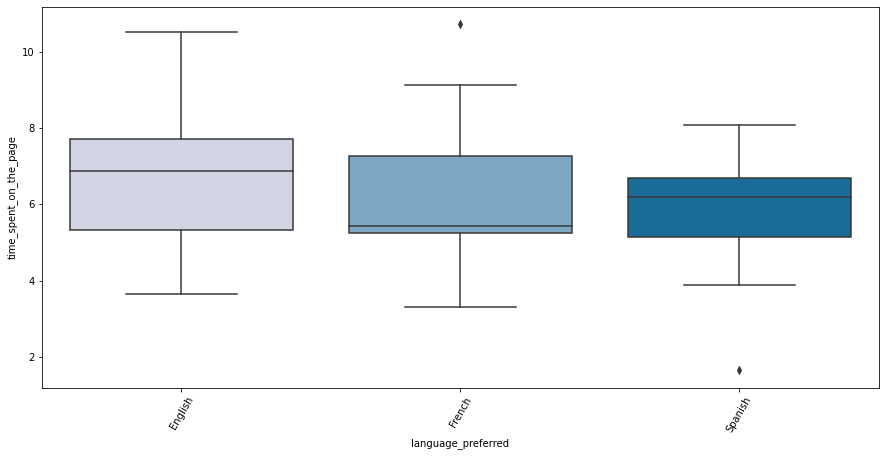

In [50]:
# Relationship between language preferred and time spent.
plt.figure(figsize=(15,7))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", data = df_new, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

## Insight:
* The box plot shows that there is only a slight difference in the means of the 3 groups and hence it supports our hypothesis also which says that the mean times are equal across the languages.

# Conclusions:
*  Users spend more time on the new landing page compared to the old landing page.
*  The conversion rate seems to be higher from the group using the new landing page.
*  The language used does not not seem to affect the number of converted subscribers or the time spent on the page.
*  Hence the company decision to offer the new landing page has been successful because we have statistically and descriptively provided evidence that it has been effective in attracting more subscribers.